## Assignment by Vijay Singh Purohit   
$Department$ : $ Data Science $

$Roll Number$ : $DS7A-2016$


Table of Content
<br><a href="#linearity">1. Linearity</a>
<br><a href="#mean">2. Mean of Residuals</a>
<br><a href="#homo">3. Check for Homoscedasticity</a>
<br><a href="#normal">4. Check for Normality of error terms/residuals</a>
<br><a href="#auto">5. No autocorrelation of residuals</a>
<br><a href="#multico">6. No perfect multicollinearity</a>
<br><a href="#other">7. Other Models for comparison</a>


## Advertising
The dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio and newspaper.
The sales are in thousands of units and the budget is in thousands of dollars.

## Collect and understand the data

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

In [4]:
ad_data = pd.read_csv('../datasets/linear/Advertising.csv',index_col='Unnamed: 0')

In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [6]:
ad_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


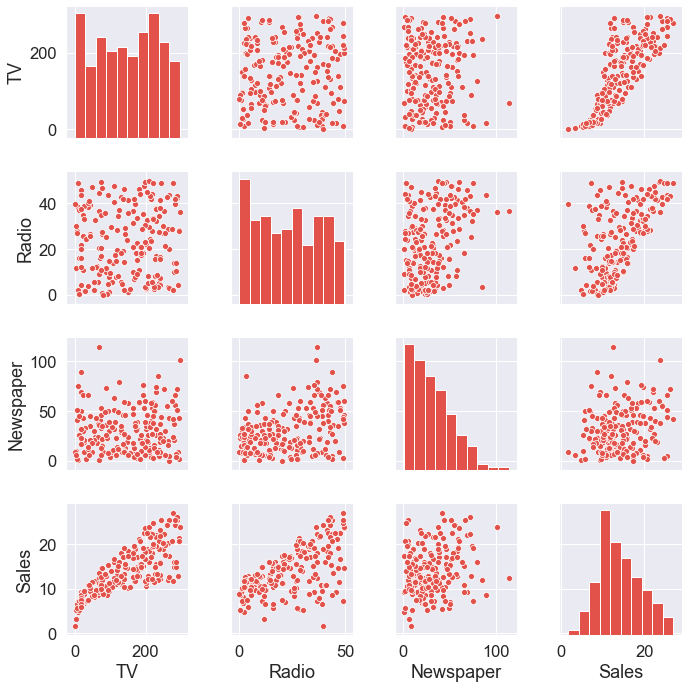

In [9]:
p = sns.pairplot(ad_data)

#  Assumptions for Linear Regression

## <a id="linearity">1. Linearity</a>


 ### Linear regression needs the relationship between the independent and dependent variables to be linear.  Let's use a pair plot to check the relation of independent variables with the Sales variable

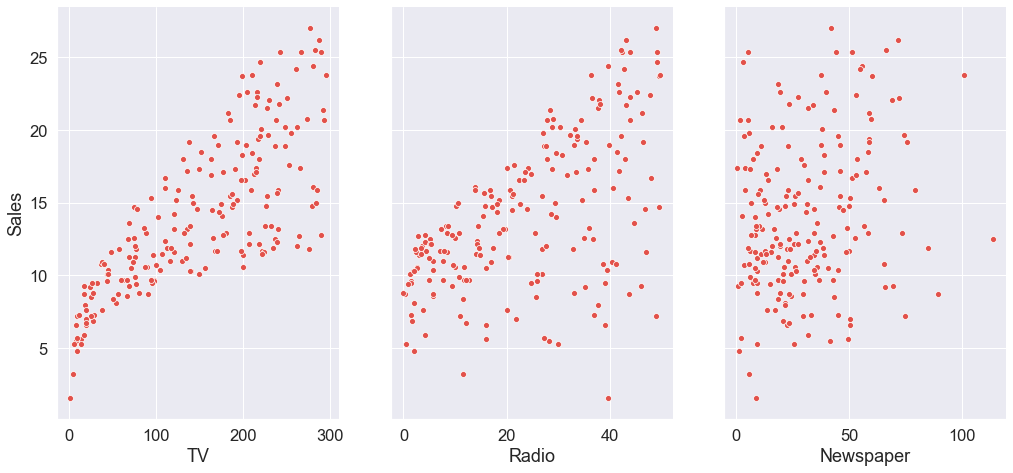

In [10]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(ad_data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7)

By looking at the plots we can see that with the Sales variable the none of the independent variables form an accurately linear shape but TV and Radio do still better than Newspaper which seems to hardly have any specific shape. So it shows that a linear regression fitting might not be the best model for it. A linear model might not be able to *efficiently* explain the data in terms of variability, prediction accuracy etc. 


### Now rest of the assumptions require us to perform the regression before we can even check for them. So let's perform regression on it.

### Fitting the linear model

In [11]:
x = ad_data.drop(["Sales"],axis=1)
y = ad_data.Sales

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

In [15]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.9072183330817297


## <a id="mean">2. Mean of Residuals</a>

### Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out.


In [16]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -6.276460832547552e-16


### Very close to zero so all good here.

## <a id="homo">3. Check for Homoscedasticity</a>

### Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

### Detecting heteroscedasticity! 
Graphical Method: Firstly do the regression analysis and then plot the error terms against the predicted values. If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present.

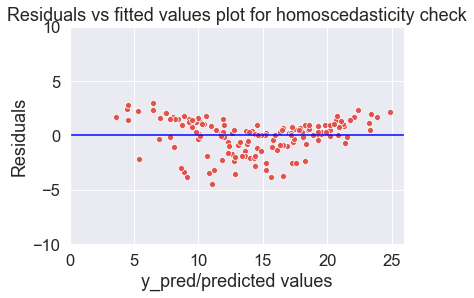

In [17]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

## <a id="normal">4. Check for Normality of error terms/residuals</a>

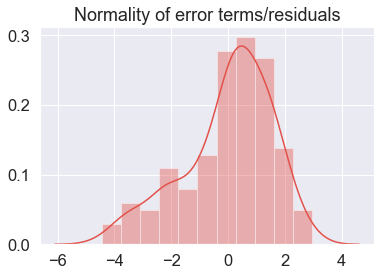

In [18]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

### The residual terms are pretty much normally distributed for the number of test points we took. Remember the central limit theorem which says that as the sample size increases the distribution tends to be normal. A skew is also visible from the plot. It's very difficult to get perfect curves, distributions in real life data.

## <a id="auto">5. No autocorrelation of residuals</a>

### When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values and that there is a definite unexplained pattern in the Y variable that shows up in the error terms. Though it is more evident in time series data.


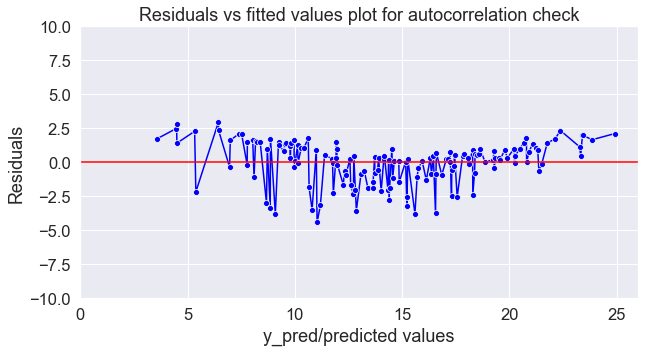

In [19]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

### Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test.
* Null Hypothesis: Autocorrelation is absent.
* Alternative Hypothesis: Autocorrelation is present.

In [20]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

0.008425577339963727

### Since p value is less than 0.05 we reject the null hypothesis that error terms are not autocorrelated.

In [21]:
import statsmodels.api as sm

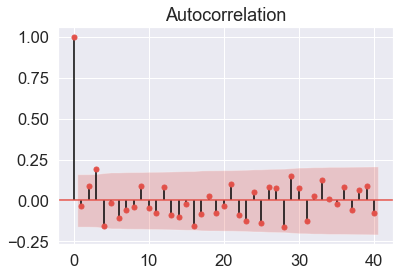

In [22]:
# autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

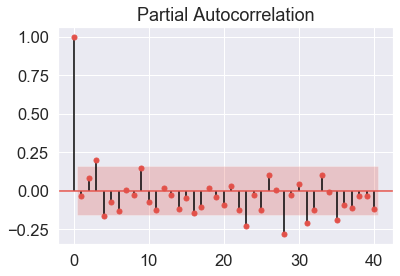

In [23]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

### The results show signs of autocorelation since there are spikes outside the red confidence interval region. This could be a factor of seasonality in the data.

## <a id="multico">6. No perfect multicollinearity</a>

### In regression, multicollinearity refers to the extent to which independent variables are correlated. Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.

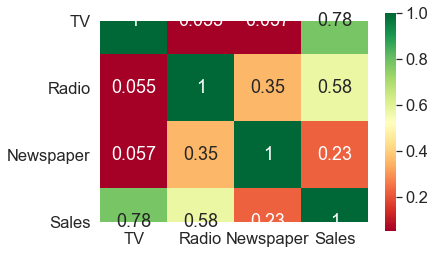

In [27]:
plt.figure()  
p=sns.heatmap(ad_data.corr(), annot=True,cmap='RdYlGn',square=True) 

### Look for correlation of rows where the dependent variable (Sales in this case) is not involved because if a variable is correlated with the dependent variable then this would be a good sign for our model. Correlation within dependent variables is what we need to look for and avoid. This data doesn't contain perfect multicollinearity among independent variables. In case there was any then we would try to remove one of the correlated variables depending on which was more important to our regression model.

# <a id="other"> 7. Some other model evaluations</a>

In [28]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(random_state=0)
dec_tree.fit(X_train,y_train)
dec_tree_y_pred = dec_tree.predict(X_train)
print("Accuracy: {}".format(dec_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=dec_tree_y_pred)))

Accuracy: 1.0
R squared: 1.0


In [29]:
from sklearn.ensemble import RandomForestRegressor

rf_tree = RandomForestRegressor(random_state=0)
rf_tree.fit(X_train,y_train)
rf_tree_y_pred = rf_tree.predict(X_train)
print("Accuracy: {}".format(rf_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=rf_tree_y_pred)))

Accuracy: 0.9942583489121577
R squared: 0.9942583489121577


In [30]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train,y_train)
svr_y_pred = svr.predict(X_train)
print("Accuracy: {}".format(svr.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=svr_y_pred)))

Accuracy: 0.9270308468624956
R squared: 0.9270308468624956


### Note that the scores are high because I have used the same data for training and testing. This also shows how significant data splitting, train_test_split() etc. are. This is only for model exploration purposes. Moreover there's almost no hyperparameter tuning done at this point to make this a simple representation but tuning can highly improve the kind of learning that the model can achieve and keep overfitting away.

Reference:
* http://r-statistics.co/Assumptions-of-Linear-Regression.html
* https://www.statisticssolutions.com/assumptions-of-linear-regression/

## Thank You